In [17]:

import numpy as np
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim
from math import sqrt, pi
import matplotlib
import os
from matplotlib.patches import Polygon, FancyArrowPatch
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pygame
from teapot import*
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *
import matplotlib.cm
import  camera
from vectors import *
from math import *
from transforms import *




In [18]:
# Multiplies an input vector by the scalar  2.0 and returns result


from vectors import scale

def scale2(v):
    return scale(2.0, v)

from vectors import *
def linear_combination(scalars,*vectors):
    scaled = [scale(s,v) for s,v in zip(scalars,vectors)]
    return add(*scaled)
# Loads triangles with code with appendix C

original_triangles = load_triangles()


scaled_triangles = [
    [scale2(vertex) for vertex in triangle]
    for triangle  in  original_triangles
]

scaled_triangles[2]

[(1.2915, 1.0521480000000003, -0.5495),
 (0.9801319999999998, 1.124108, -0.9801359999999999),
 (0.9940000000000002, 1.0521480000000005, -0.994)]

In [19]:
from vectors  import add

def translateleft(v):
    return add((-1,0,0), v)

In [20]:
scaled_translated_triangles = [
    [translateleft(scale2(vertex)) for vertex in triangle]
    for triangle in original_triangles
]

#draw_model(scaled_translated_triangles)

In [21]:
# composing vector transformations

def scale2_then_translateleft(v):
    return translateleft(scale2(v))

In [22]:
# Chapter 5: Computing transformations with matrices
    # We can write Py code that multiplies a matrix B by a vector 
    
matrix = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

vector = (3, -2, 5)

In [23]:
list(zip(*B))

# Gets linear combination of these vectors, where the scalars arethe coorsdinates of v. Serving as list of scalars

def multiply_matrix_vector(B, v):
    return linear_combination(vector, *zip(*matrix))

multiply_matrix_vector(B, v)

(1, -2, -2)

In [24]:
def matrix_multiply(a,b):
    return tuple(
        tuple(dot(row,col) for col in zip(*b))
        for row in a
    )

In [25]:
a = ((1,1,0),(1,0,1),(1,-1,1), (0,1,0))
b = ((0,2,1),(0,1,0),(1,0,-1),(1,0,0))

matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0), (0, 1, 0))

In [26]:
c = ((1,2),(3,4))
d = ((0,-1),(1,0))

matrix_multiply(c,d)



((2, -1), (4, -3))

In [ ]:
def get_rotation_matrix(t):
    seconds = t/1000
    return (
        (cos(seconds), 0, -sin(seconds)),
        (0,1,0),
        (sin(seconds), 0, cos(seconds))
    )
    
#draw_model(load_triangles(),
 #          get_matrix = get_rotation_matrix)


In [49]:
def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        return tuple (1 if i==j else 0 for j in range(1, n+1))
    standard_basis = [standard_basis_vector(i) for i in range(1, n+1)]
    cols = [transformation(v) for v in standard_basis]
    return tuple(zip(*cols))

In [50]:
from transforms import rotate_z_by

infer_matrix(3, rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

In [51]:
def multiply_matrix_vector(matrix,vector):
    return tuple(
        sum(vector_entry * matrix_entry
            for vector_entry, matrix_entry in zip(row,vector))
        for row in matrix
    )
    
multiply_matrix_vector(b,v) #should be same as before

(-6, -2, 3, 1)

In [21]:
from vectors import *

def multiply_matrix_vector(matrix,vector):
    return tuple(
        dot(row,vector)
        for row in matrix
    )
multiply_matrix_vector(b,v) #should be same as before


NameError: name 'b' is not defined

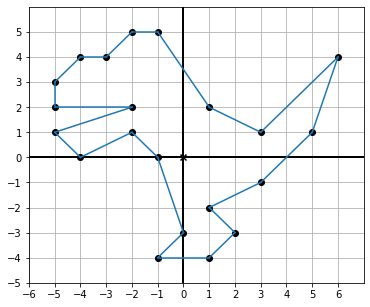

In [22]:
from vector_drawing import *

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),(-5,3)]
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

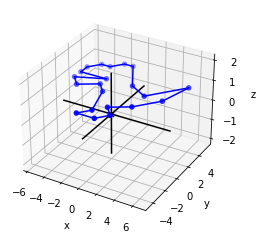

In [23]:
# Gets the segments of the dinosaur poly in 3D

from draw3d import *

def polygon_segments_3d(points, color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count], color=color) for i in range(0, count)]

dino_3d = [(x,y,1) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

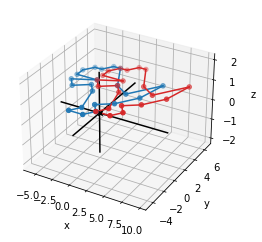

In [27]:
magic_matrix = (
    (1,0,3),
    (0,1,1),
    (0,0,1))


translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3'),
    save_as='figures/5.27.svg'
)


In [29]:
rotate_n_translate = ((0,-1,3), (1,0,1), (0,0,1))

rotated_translated_dino = [
    multiply_matrix_vector(rotate_n_translate, v)
    for v in dino_vectors]

In [30]:
def translate_3d(translation):
    def new_function(target):
        a,b,c = translation
        x,y,z = target
        matrix = ((1,0,0,a), 0,1,0,b), (0,0,1,c), (0,0,0,1)
        x_out, y_out, z_out, _ = \
            multiply_matrix_vector(matrix, vector)
        
        return (x_out,y_out, z_out)
    
    return new_function
                